In [ ]:
# Imports
library(Seurat)
library(SingleCellExperiment)
library(SingleR)
library(celldex)    
library(ggplot2)
library(clustree)
library(stringr) 
library(gridExtra)
library(dplyr)

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=20, repr.plot.height=12)

# Read macrophage data of mouse
macrophages <- readRDS("../../../data/R Objects/Macrophage R Objects/all_mice_macrophage_subset.rds")

Warning message:
"package 'Seurat' was built under R version 4.4.2"
Loading required package: SeuratObject

Warning message:
"package 'SeuratObject' was built under R version 4.4.2"
Loading required package: sp

Warning message:
"package 'sp' was built under R version 4.4.2"

Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.4.2"

Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, 

In [ ]:
# View amount of macrophage cells
ncol(macrophages)

[1] 1464

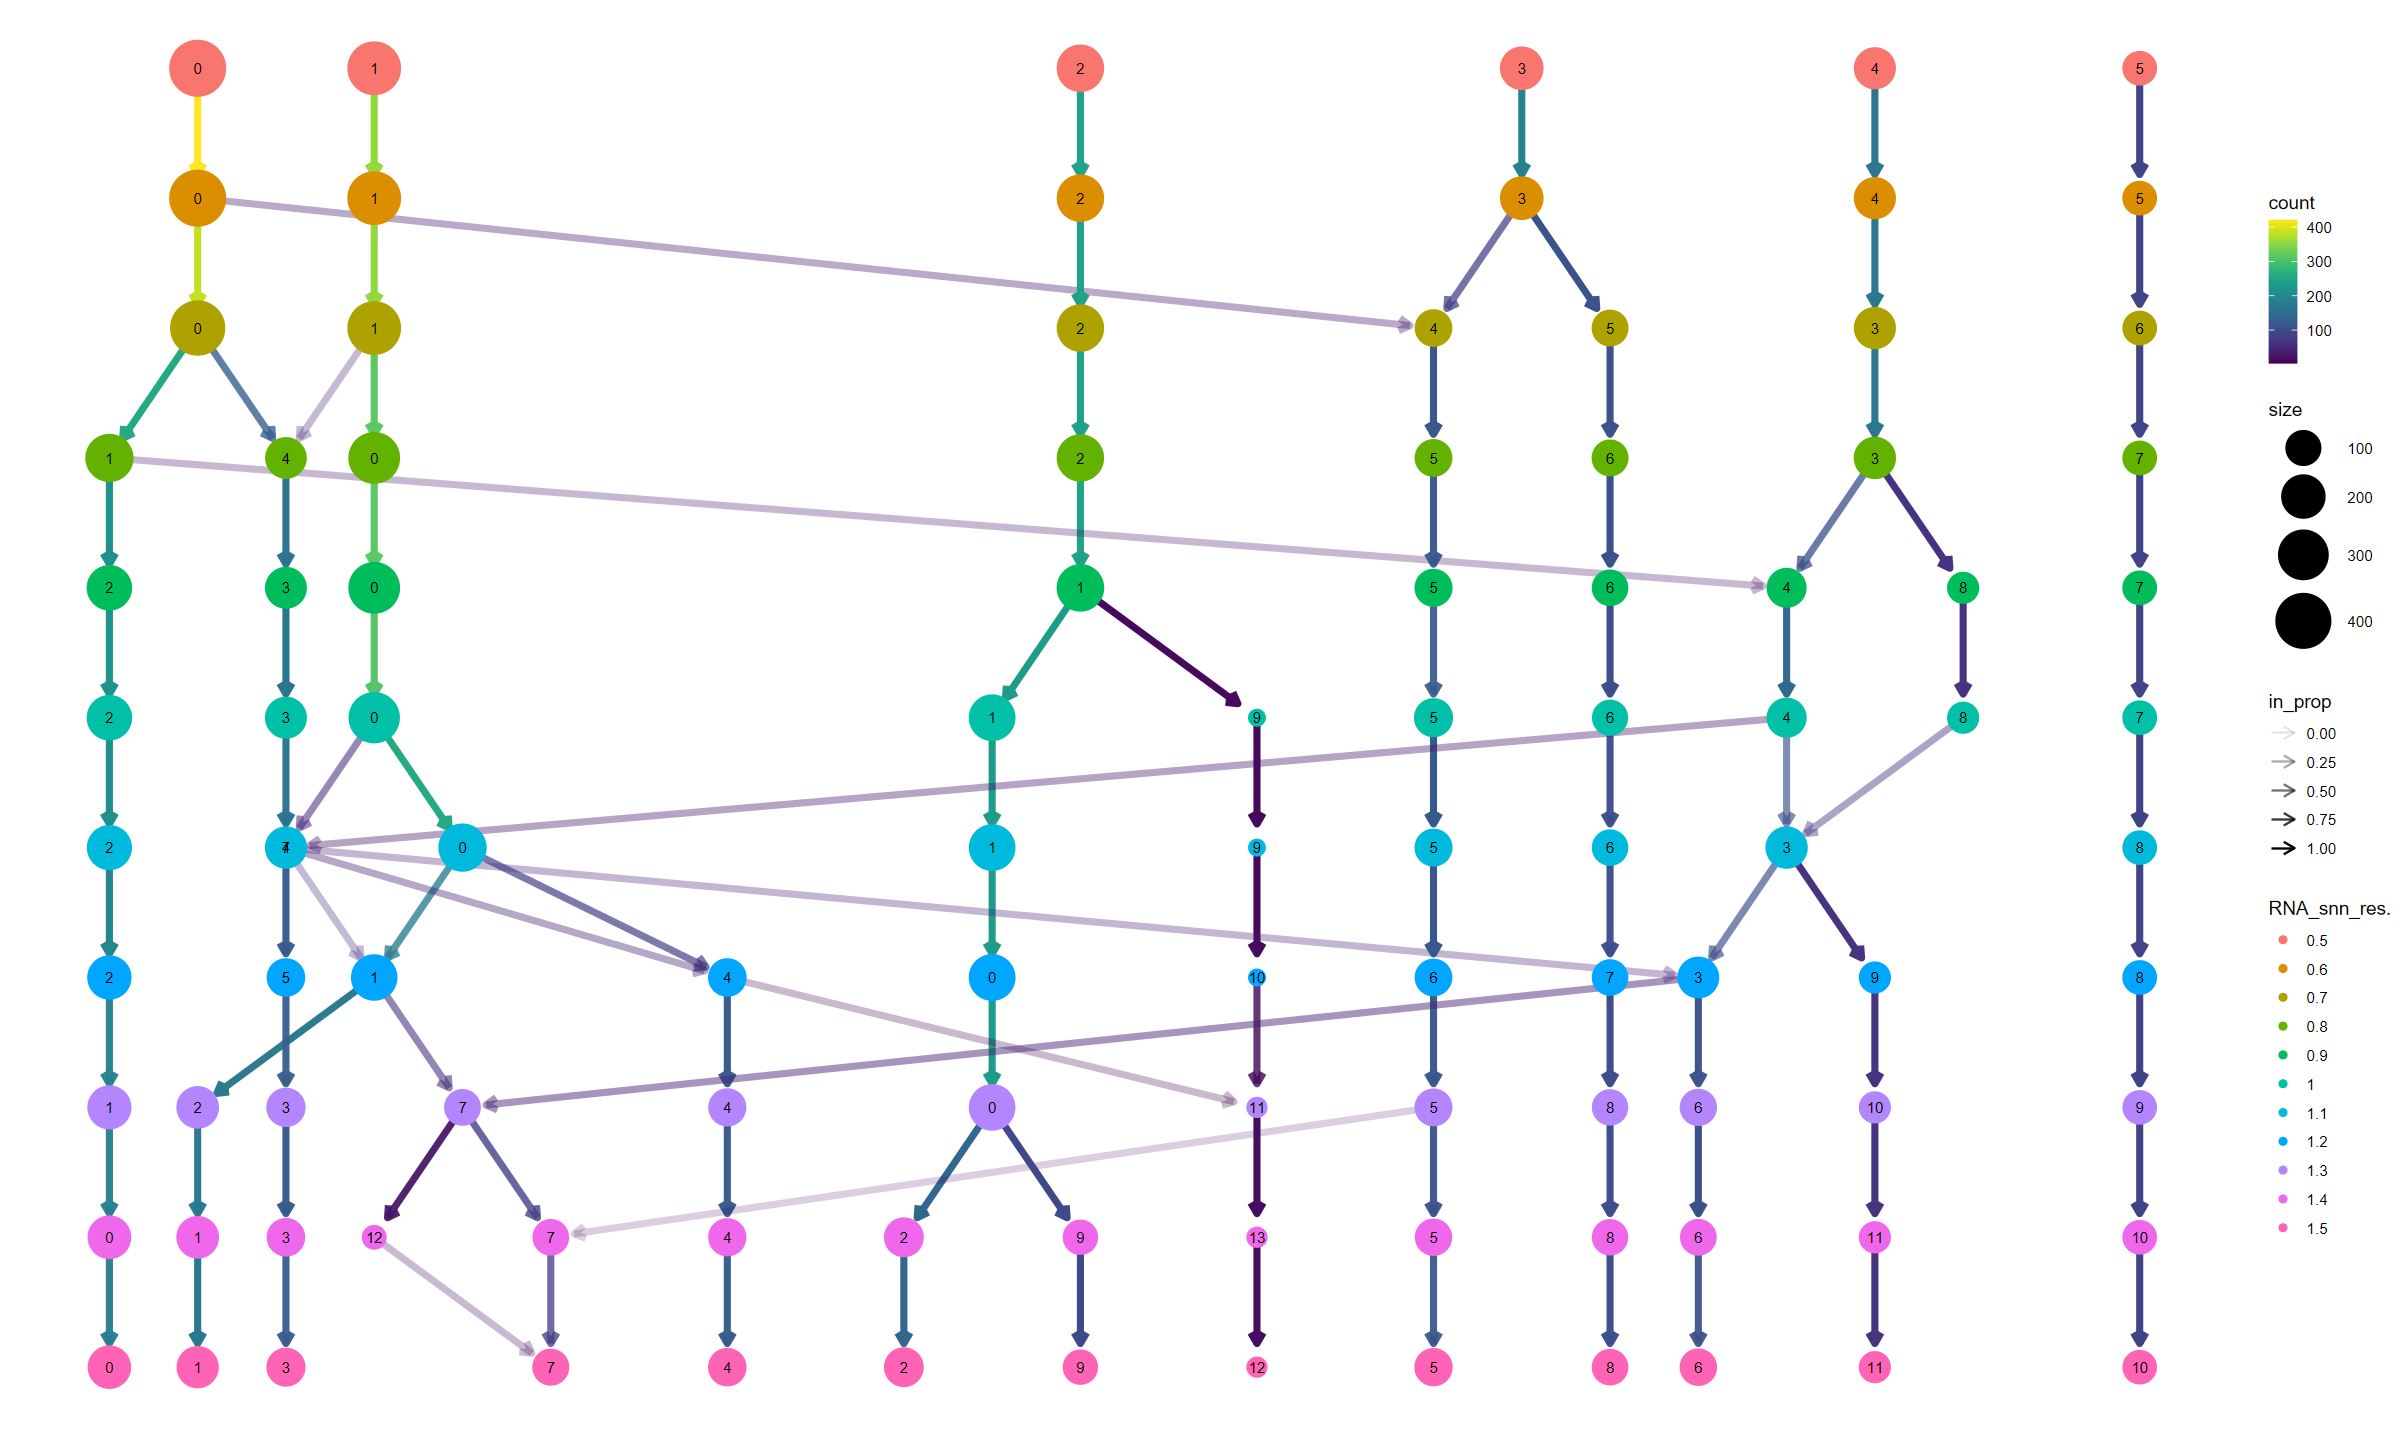

In [6]:
# This cell is meant to analyze the different resolutions and see which one is the best
clustree(macrophages, prefix= "RNA_snn_res.", layout = "sugiyama")

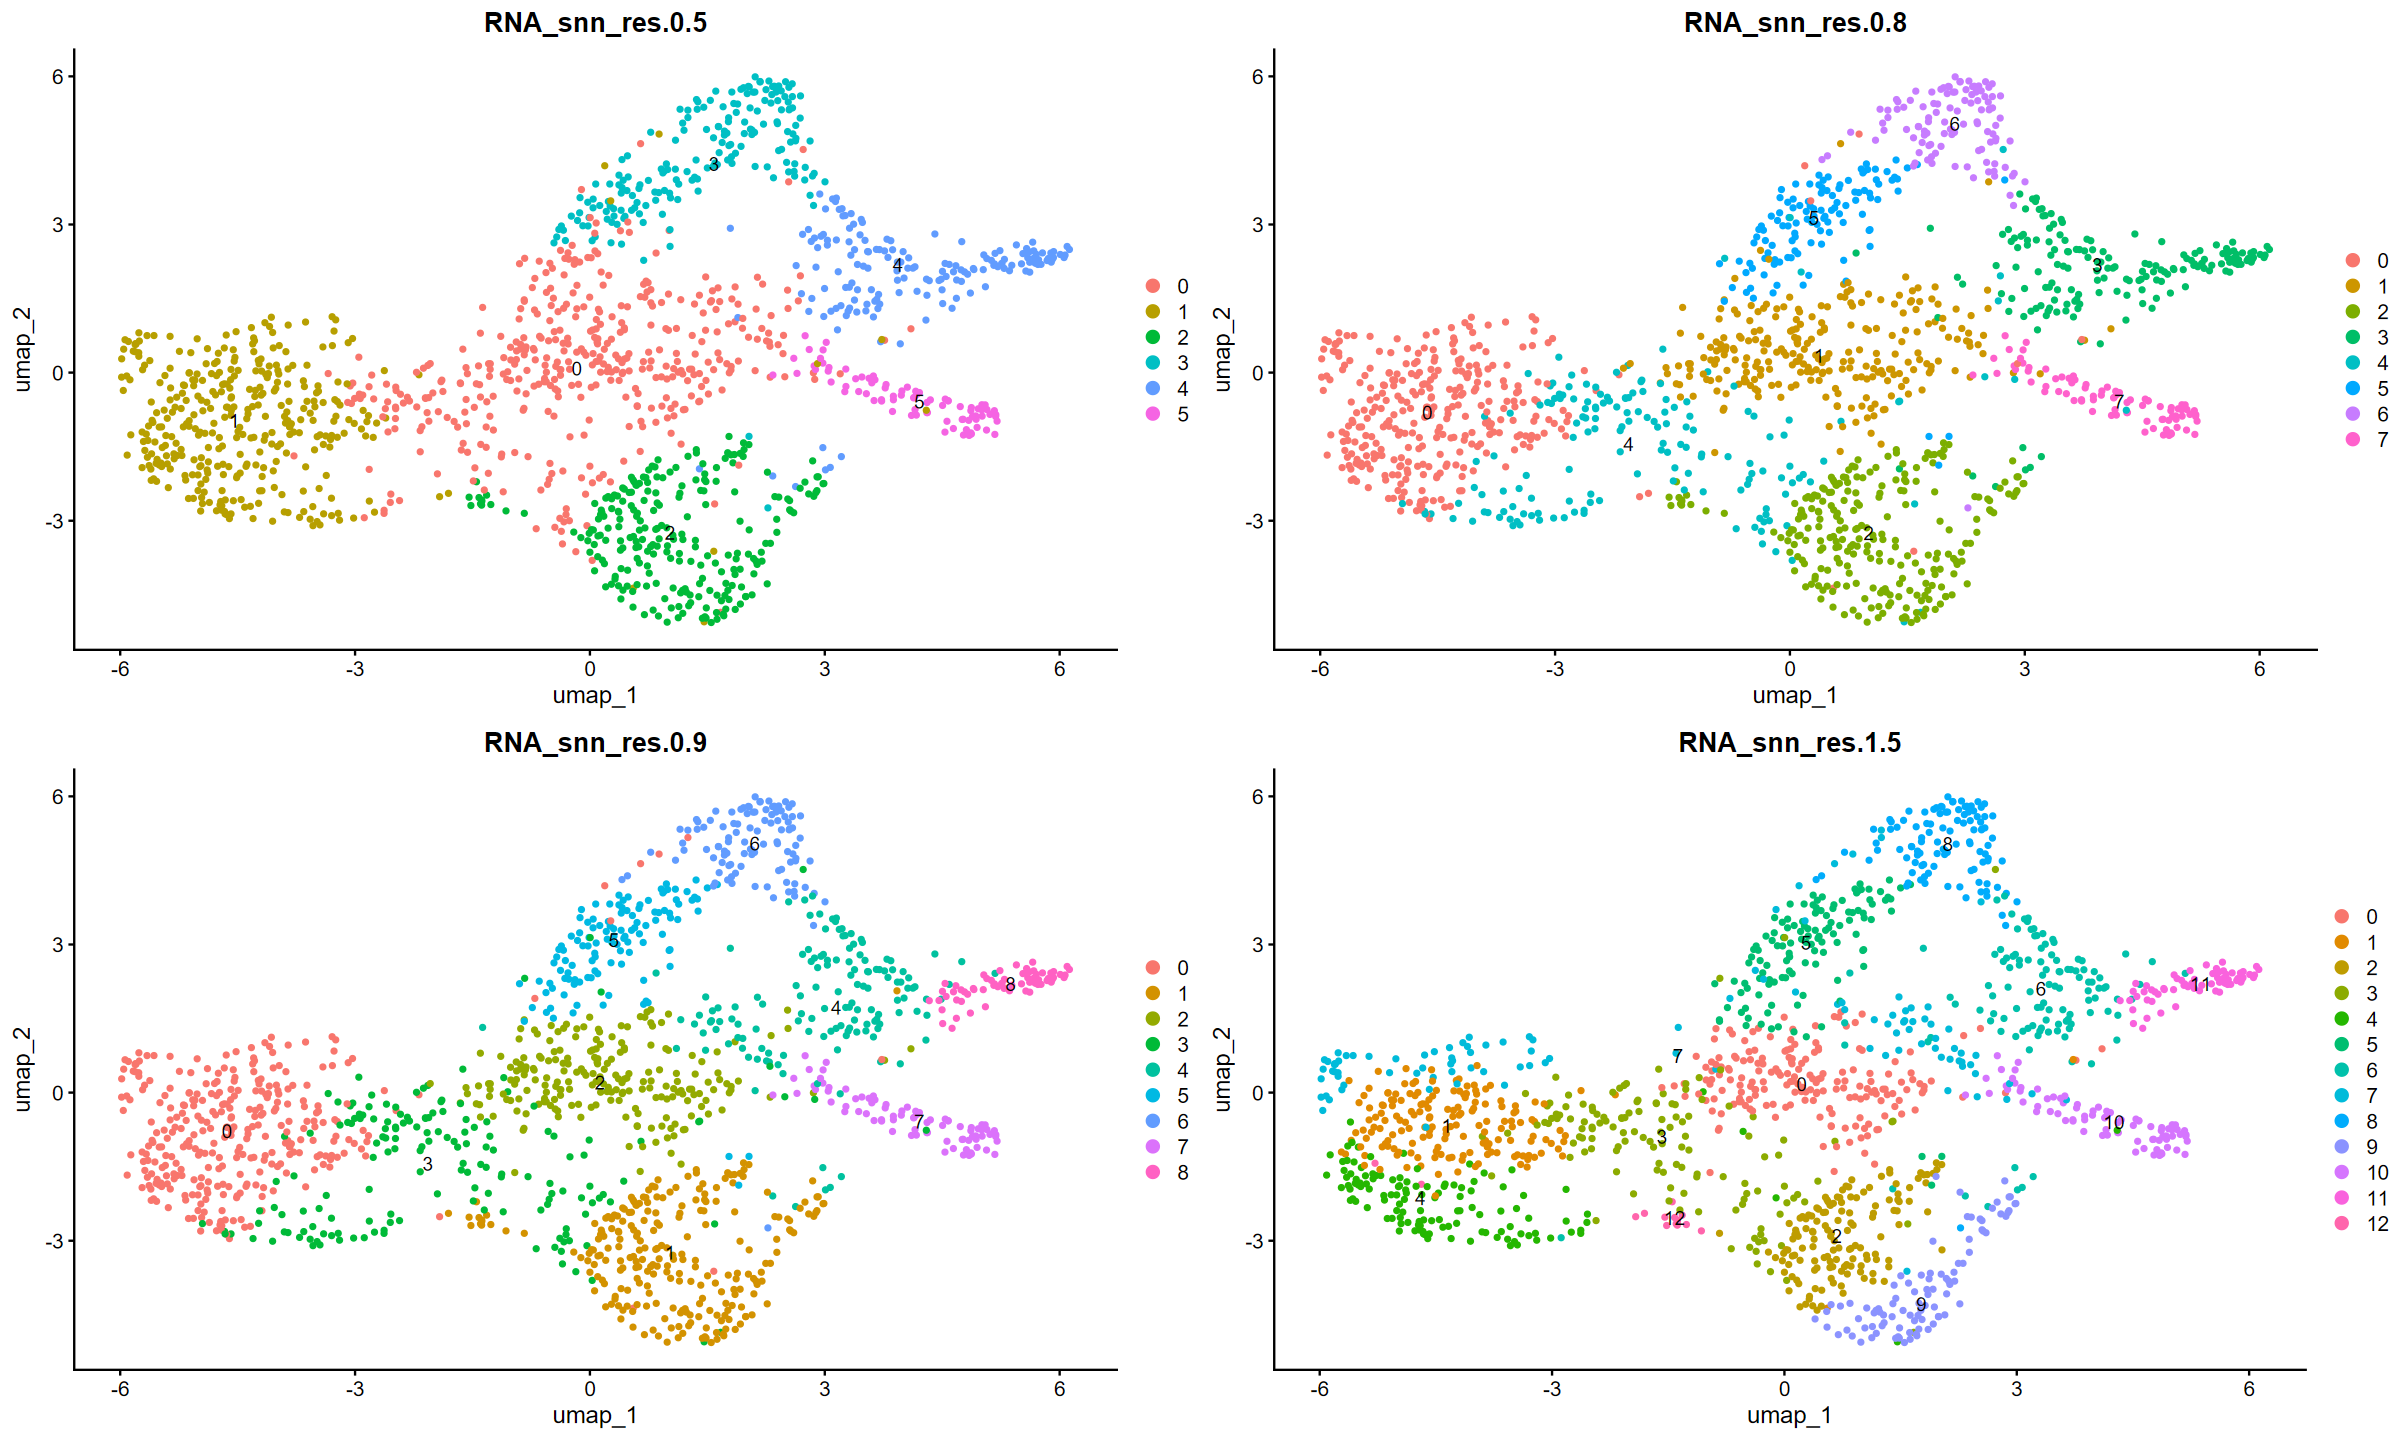

In [3]:
# Get DimPlots of different resolutions
res_1 <- DimPlot(macrophages, reduction = "umap", group.by = "RNA_snn_res.0.5", label = T)
res_2 <- DimPlot(macrophages, reduction = "umap", group.by = "RNA_snn_res.0.8", label = T)
res_3 <- DimPlot(macrophages, reduction = "umap", group.by = "RNA_snn_res.0.9", label = T)
res_4 <- DimPlot(macrophages, reduction = "umap", group.by = "RNA_snn_res.1.5", label = T)

# Plot
grid.arrange(res_1, res_2, res_3, res_4, ncol=2)

# Assign the slot "Seurat Cluster" to the desired resolution
macrophages$seurat_clusters <- macrophages$`RNA_snn_res.1.5`

In [ ]:
# View distribution of idents before assigning resolution
table(Idents(macrophages))

# Assign resolution to identity
macrophages <- SetIdent(macrophages, value = "RNA_snn_res.1.5")

# View distribution of idents after assigning resolution
table(Idents(macrophages))


  0   1   2   3   4   5   6   7   8   9  10  11  12 
187 170 140 131 125 123 114 109 105  93  86  66  15 


  0   1   2   3   4   5   6   7   8   9  10  11  12 
187 170 140 131 125 123 114 109 105  93  86  66  15 

Calculating cluster 0



Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Warning message in DoHeatmap(macrophages, features = top10$gene, size = 1, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Bc004004, 0610012g03rik, Blmh, BC017643, Tmem176a, Tmem38b, Glg1, Gna12, Bc017643, Bc005624, 37500, Ctsf, Slc9a9"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


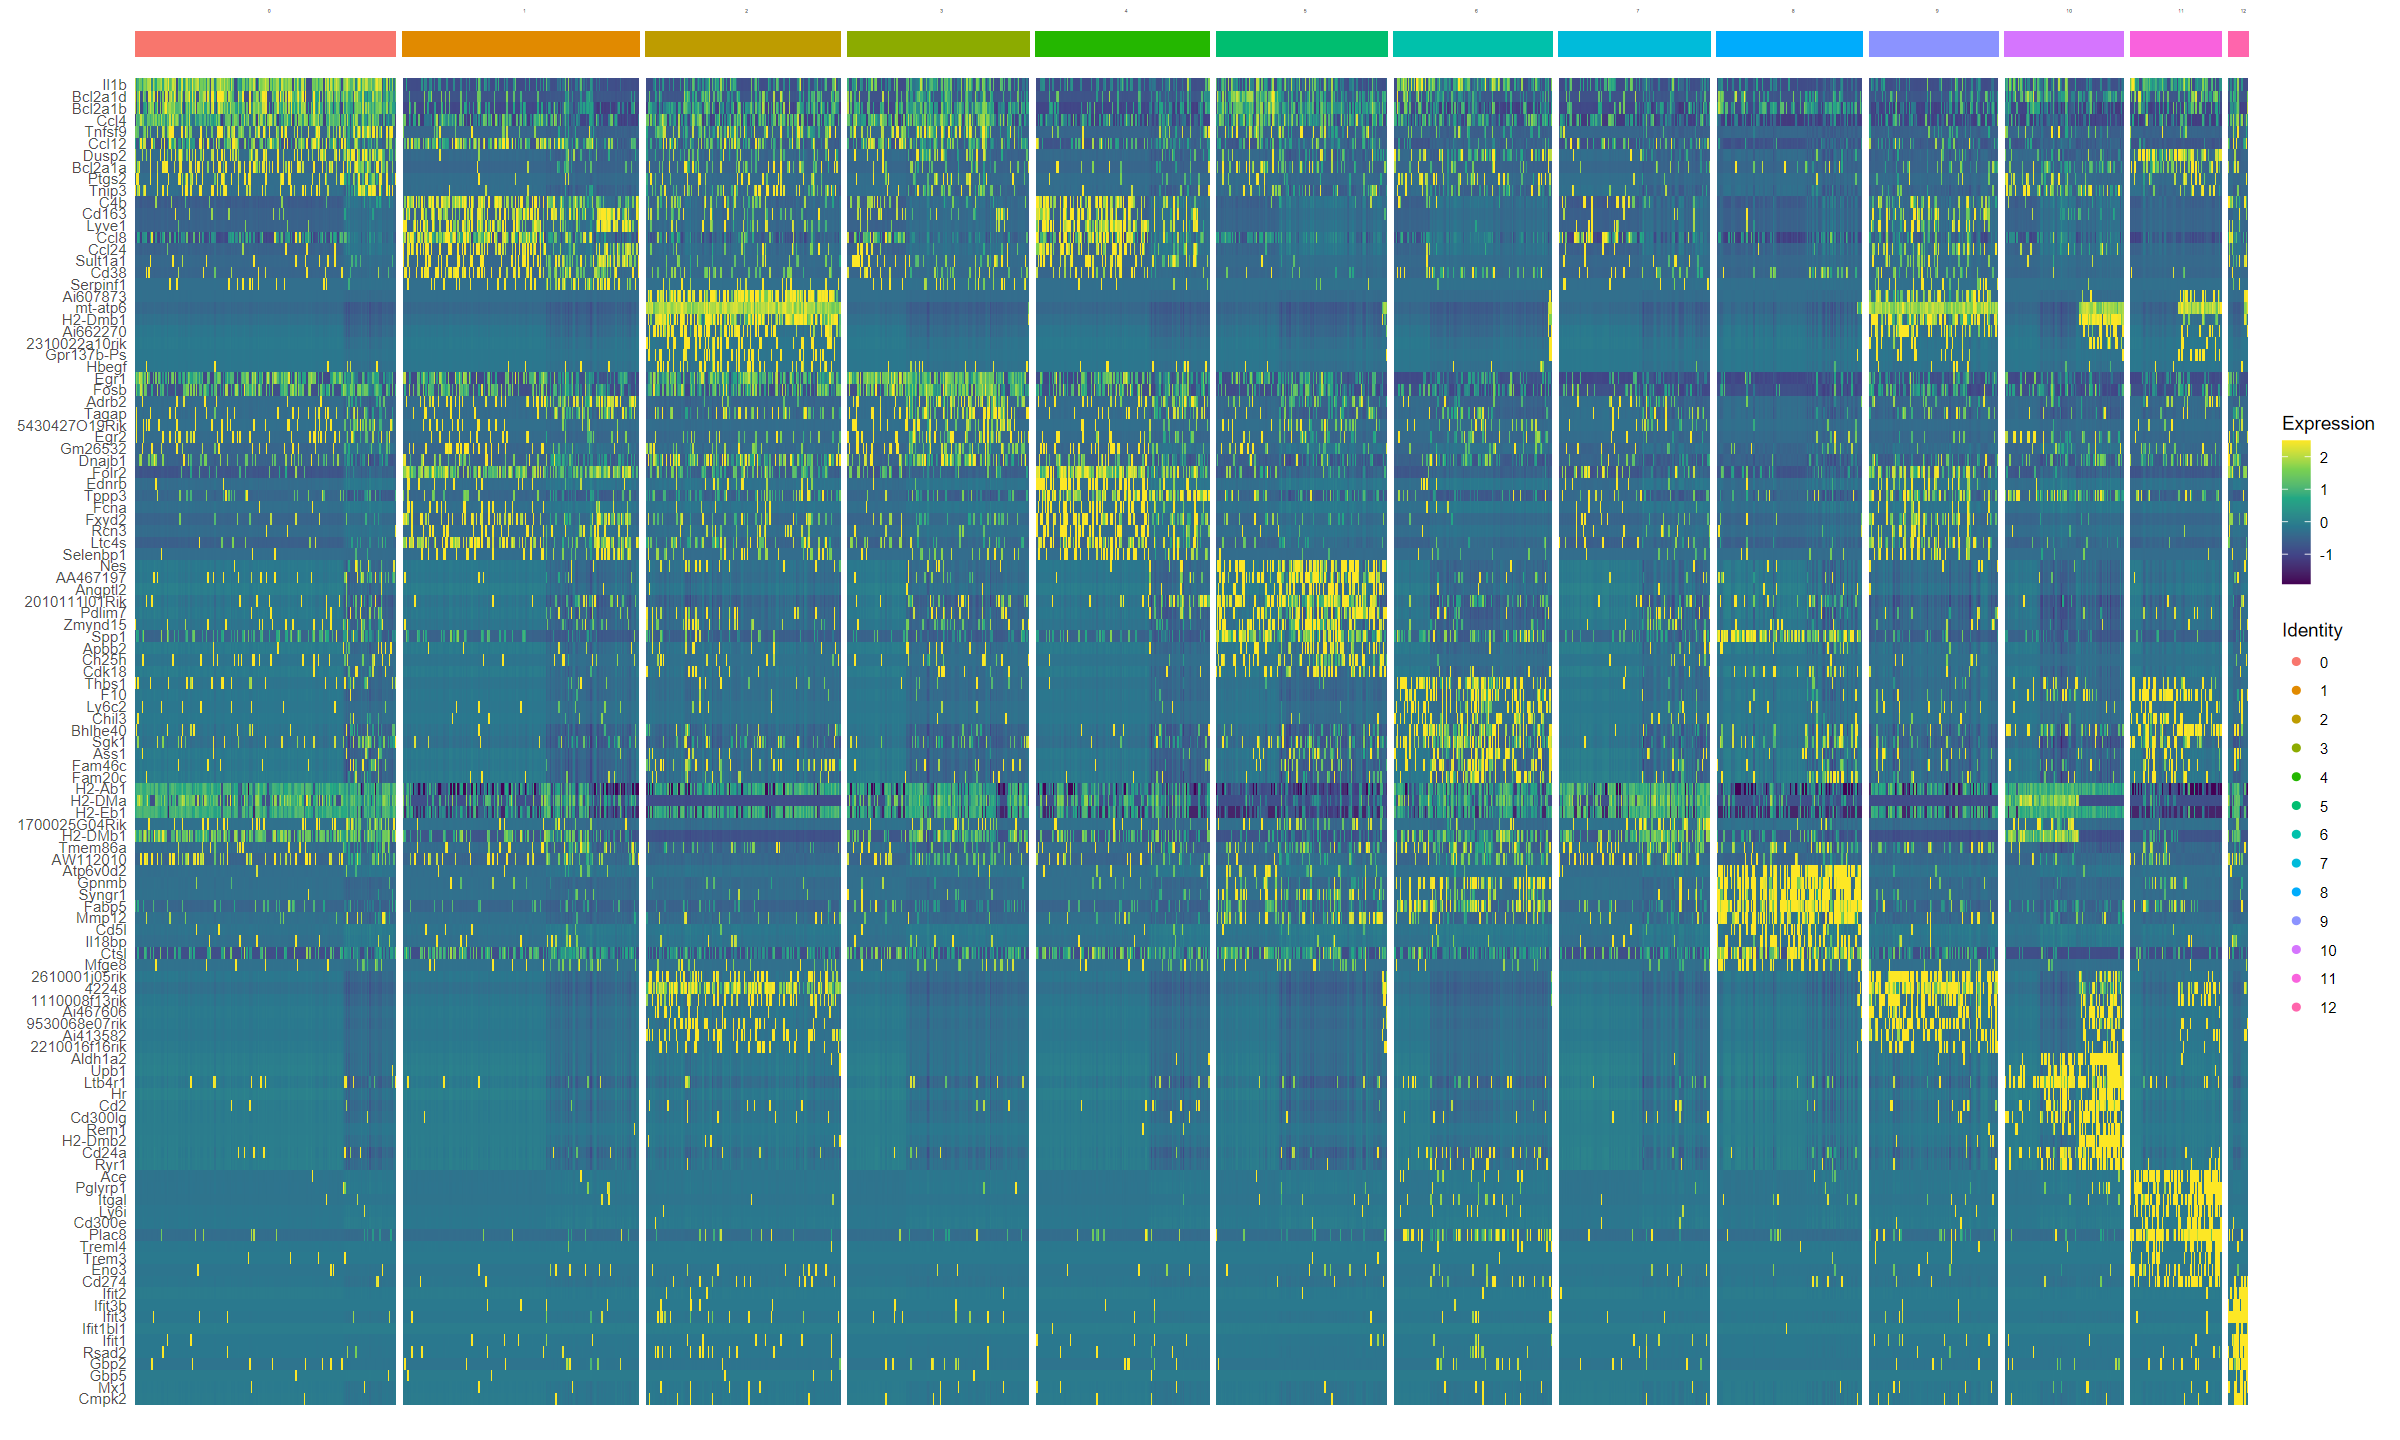

In [ ]:
# Find markers for each cluster
markers <- FindAllMarkers(macrophages, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Heatmap
top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)
DoHeatmap(macrophages, features = top10$gene, size=1, angle=0, raster=FALSE) &
  scale_fill_viridis_c(option="blue",na.value = "white")

In [ ]:
# Filter markers
markers %>% group_by(cluster) %>% filter(as.numeric(as.character(cluster)) > 8) %>% filter(p_val_adj < 0.05) %>% slice_max(order_by = avg_log2FC, n = 10) %>% arrange(cluster, desc(pct.1)) 

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene         
1   5.516314e-80 3.355408   0.806 0.104  1.691412e-75 9       42248        
2   9.200927e-87 3.990662   0.613 0.044  2.821188e-82 9       2610001j05rik
3   8.904042e-52 3.431830   0.495 0.053  2.730157e-47 9       1110008f13rik
4   1.808902e-47 3.507312   0.441 0.046  5.546455e-43 9       0610012g03rik
5   1.267194e-50 3.558151   0.419 0.036  3.885470e-46 9       9530068e07rik
6   2.511527e-51 4.060677   0.355 0.023  7.700845e-47 9       Ai467606     
7   3.889611e-35 3.342697   0.355 0.040  1.192633e-30 9       Ai413582     
8   2.807351e-37 3.622201   0.333 0.033  8.607899e-33 9       Bc004004     
9   9.337517e-34 3.416587   0.312 0.031  2.863070e-29 9       Bc005624     
10  3.456434e-26 3.406544   0.258 0.028  1.059812e-21 9       2210016f16rik
11  3.675496e-96 4.478370   0.709 0.054  1.126981e-91 10      Ltb4r1       
12  4.175470e-76 4.444313   0.488 0.027  1.280283e-71 10      Cd2          
13  8.859607e-60 4.312048   0.488 0.041  2.716533e-55 10      Cd24a        
14 1.047082e-119 7.101284   0.465 0.006 3.210562e-115 10      Aldh1a2      
15  4.723597e-72 4.424092   0.407 0.017  1.448349e-67 10      Cd300lg      
16 5.136961e-109 8.053456   0.384 0.002 1.575095e-104 10      Upb1         
17  7.144595e-55 4.579758   0.337 0.017  2.190676e-50 10      Ryr1         
18  1.342195e-69 6.326099   0.314 0.007  4.115438e-65 10      H2-Dmb2      
19  1.492576e-90 9.444673   0.291 0.000  4.576537e-86 10      Hr           
20  6.104737e-70 6.677897   0.267 0.003  1.871834e-65 10      Rem1         
21  1.963947e-70 4.957649   0.818 0.107  6.021855e-66 11      Plac8        
22 1.150026e-146 6.963310   0.652 0.012 3.526211e-142 11      Ace          
23 5.220534e-101 6.239611   0.621 0.027  1.600720e-96 11      Itgal        
24 1.616392e-114 8.393183   0.576 0.016 4.956181e-110 11      Pglyrp1      
25  7.563472e-90 7.323976   0.424 0.009  2.319112e-85 11      Ly6i         
26  2.322819e-47 5.347998   0.424 0.034  7.122226e-43 11      Eno3         
27  3.066309e-43 4.629980   0.394 0.031  9.401915e-39 11      Cd274        
28  1.552884e-62 6.312895   0.333 0.010  4.761453e-58 11      Treml4       
29  3.048302e-71 6.305693   0.318 0.006  9.346704e-67 11      Cd300e       
30  6.286834e-56 5.852738   0.288 0.008  1.927669e-51 11      Trem3        
31  2.161802e-80 7.224602   1.000 0.032  6.628517e-76 12      Ifit3        
32  6.876249e-38 5.962037   0.800 0.048  2.108396e-33 12      Gbp2         
33  3.307017e-92 6.876975   0.733 0.012  1.013998e-87 12      Ifit3b       
34  4.346383e-48 6.685097   0.733 0.030  1.332688e-43 12      Ifit1        
35 2.874892e-107 8.548665   0.667 0.007 8.814994e-103 12      Ifit2        
36  4.505188e-39 7.489675   0.667 0.031  1.381381e-34 12      Rsad2        
37  1.342263e-34 5.948686   0.533 0.022  4.115645e-30 12      Mx1          
38  5.891522e-30 6.251819   0.467 0.019  1.806458e-25 12      Cmpk2        
39  5.879020e-36 6.260535   0.333 0.007  1.802625e-31 12      Gbp5         
40  1.915350e-49 8.056264   0.267 0.002  5.872847e-45 12      Ifit1bl1

In [ ]:
# Set identity to resolution of clustering
macrophages <- SetIdent(macrophages, value = "seurat_clusters")

# Some marker genes according to Winther & Willemsen
features_inflammatory <- c("S100a8", "S100a9", "Il1b", "Casp1", "Casp4", "Nlrp3")
features_resident <- c("Lyve1", "Cx3cr1", "Folr2", "C1qa", "C1qb", "C1qc", "Cd74")  #, "Hla-dra", "Hla-drb1") Dit zijn menselijke genen, ortholoog staat niet tussen features
features_trem2 <- c("Trem2", "Cd9", "Fabp5", "Apoe", "Apoc1")
features_ifnic <- c("Isg15", "Irf7", "Ifit3", "Ifit1")
features_proliferating <- c("Stmn1", "Top2a", "Mki67", "Tuba1b", "Tubb5")
features_ILAM <- c("Trem1", "Ccl2", "Plin2", "Spink1", "Defb1", "Il1b", "Ccl7", "Olr1", "H2-Dma", "H2-DMb1", "H2-DMa") #, "S100a12"

# Add a module score to the Seurat object
macrophages <- AddModuleScore(macrophages, features = list(features_inflammatory), name = "FeatureGeneScore_inflammatory")
macrophages <- AddModuleScore(macrophages, features = list(features_resident), name = "FeatureGeneScore_resident_like")
macrophages <- AddModuleScore(macrophages, features = list(features_trem2), name = "FeatureGeneScore_trem2")
macrophages <- AddModuleScore(macrophages, features = list(features_ifnic), name = "FeatureGeneScore_ifnic")
macrophages <- AddModuleScore(macrophages, features = list(features_proliferating), name = "FeatureGeneScore_proliferating")
macrophages <- AddModuleScore(macrophages, features = list(features_ILAM), name = "FeatureGeneScore_ilam")

# Vln plots
inflammatory_vln <- VlnPlot(macrophages, features = "FeatureGeneScore_inflammatory1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for inflammatory macrophage markers")
residents_vln <- VlnPlot(macrophages, features = "FeatureGeneScore_resident_like1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for resident-like macrophage markers")
trem2_vln <- VlnPlot(macrophages, features = "FeatureGeneScore_trem21", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for trem2 foamy macrophage markers")
ifn_vln <- VlnPlot(macrophages, features = "FeatureGeneScore_ifnic1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for IFNIC macrophage markers")
proliferating_vln <- VlnPlot(macrophages, features = "FeatureGeneScore_proliferating1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for proliferating macrophage markers")
ilam_vln <- VlnPlot(macrophages, features = "FeatureGeneScore_ilam1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for ILAM macrophage markers")
  
# Visualizing DotPlots to view marker genes
inflammatory_dot <- DotPlot(macrophages, features = features_inflammatory) + 
  ggtitle("Inflammatory Macrophages") + RotatedAxis()

resident_dot <- DotPlot(macrophages, features = features_resident) + 
  ggtitle("Resident-Like Macrophages")

TREM2_dot <- DotPlot(macrophages, features = features_trem2) + 
  ggtitle("TREM2 'Foamy' Macrophages")

IFNIC_dot <- DotPlot(macrophages, features = features_ifnic) + 
  ggtitle("IFNIC Macrophages")

proliferating_dot <- DotPlot(macrophages, features = features_proliferating) + 
  ggtitle("Proliferating Macrophages")

ilam_dot <- DotPlot(macrophages, features = features_ILAM) + 
  ggtitle("PLIN2 / TREM1 Macrophages")

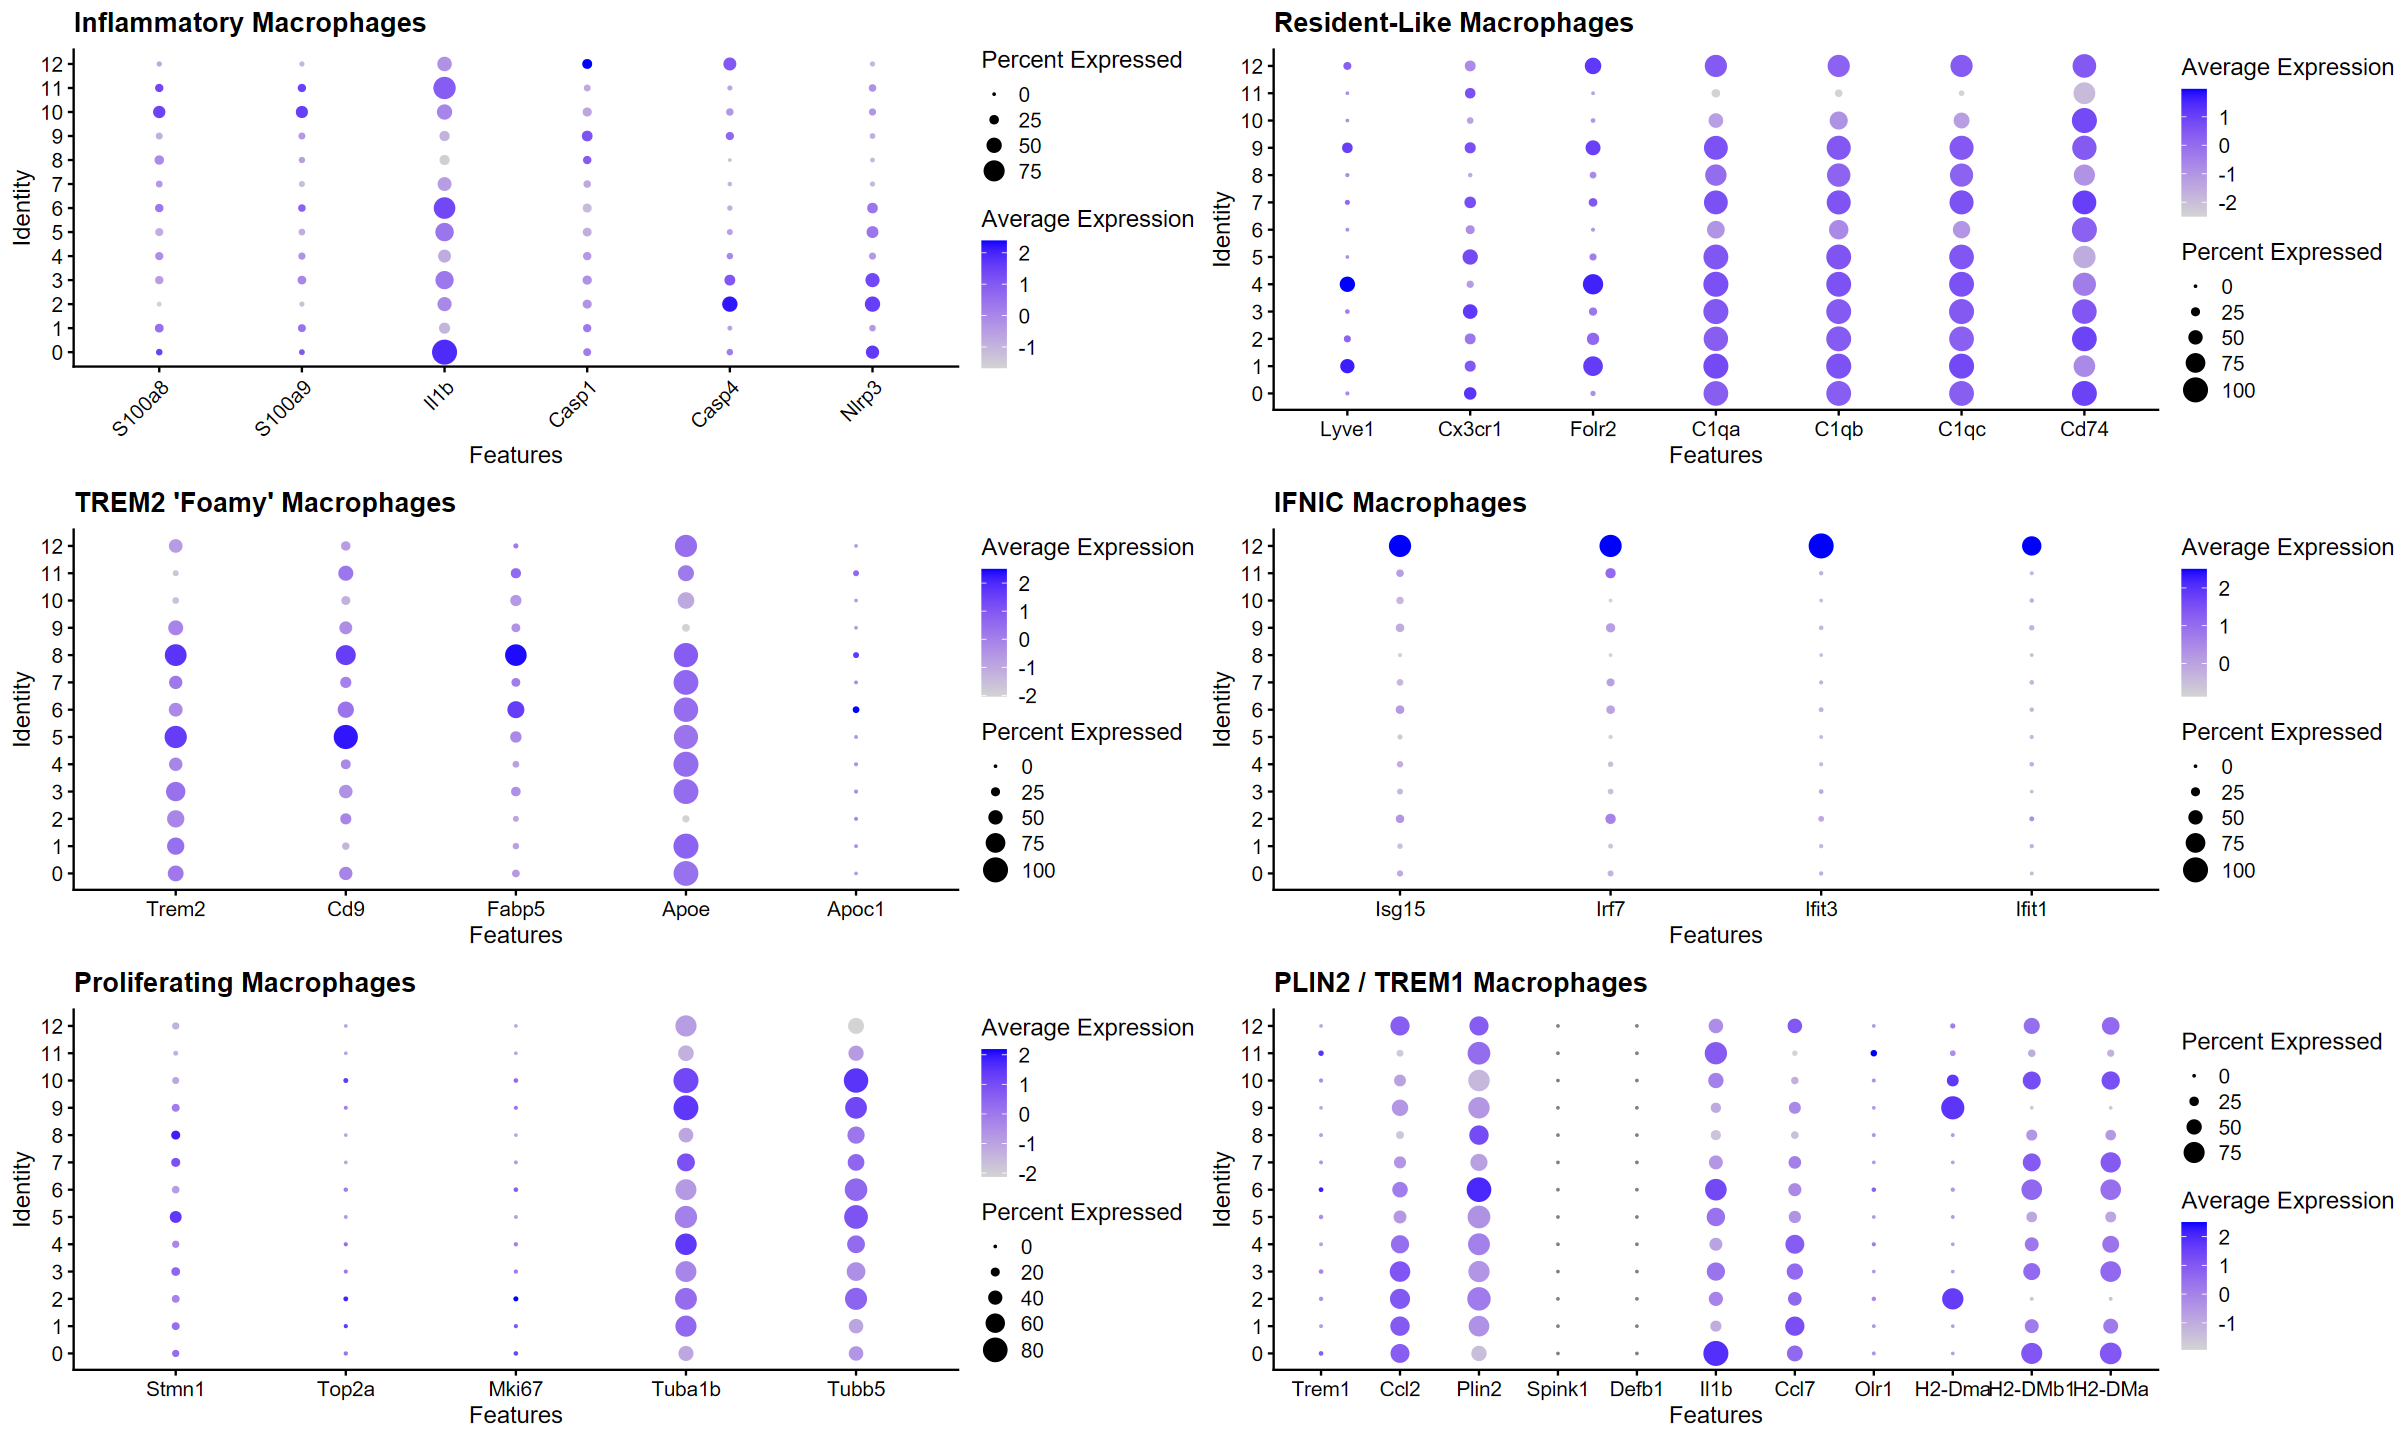

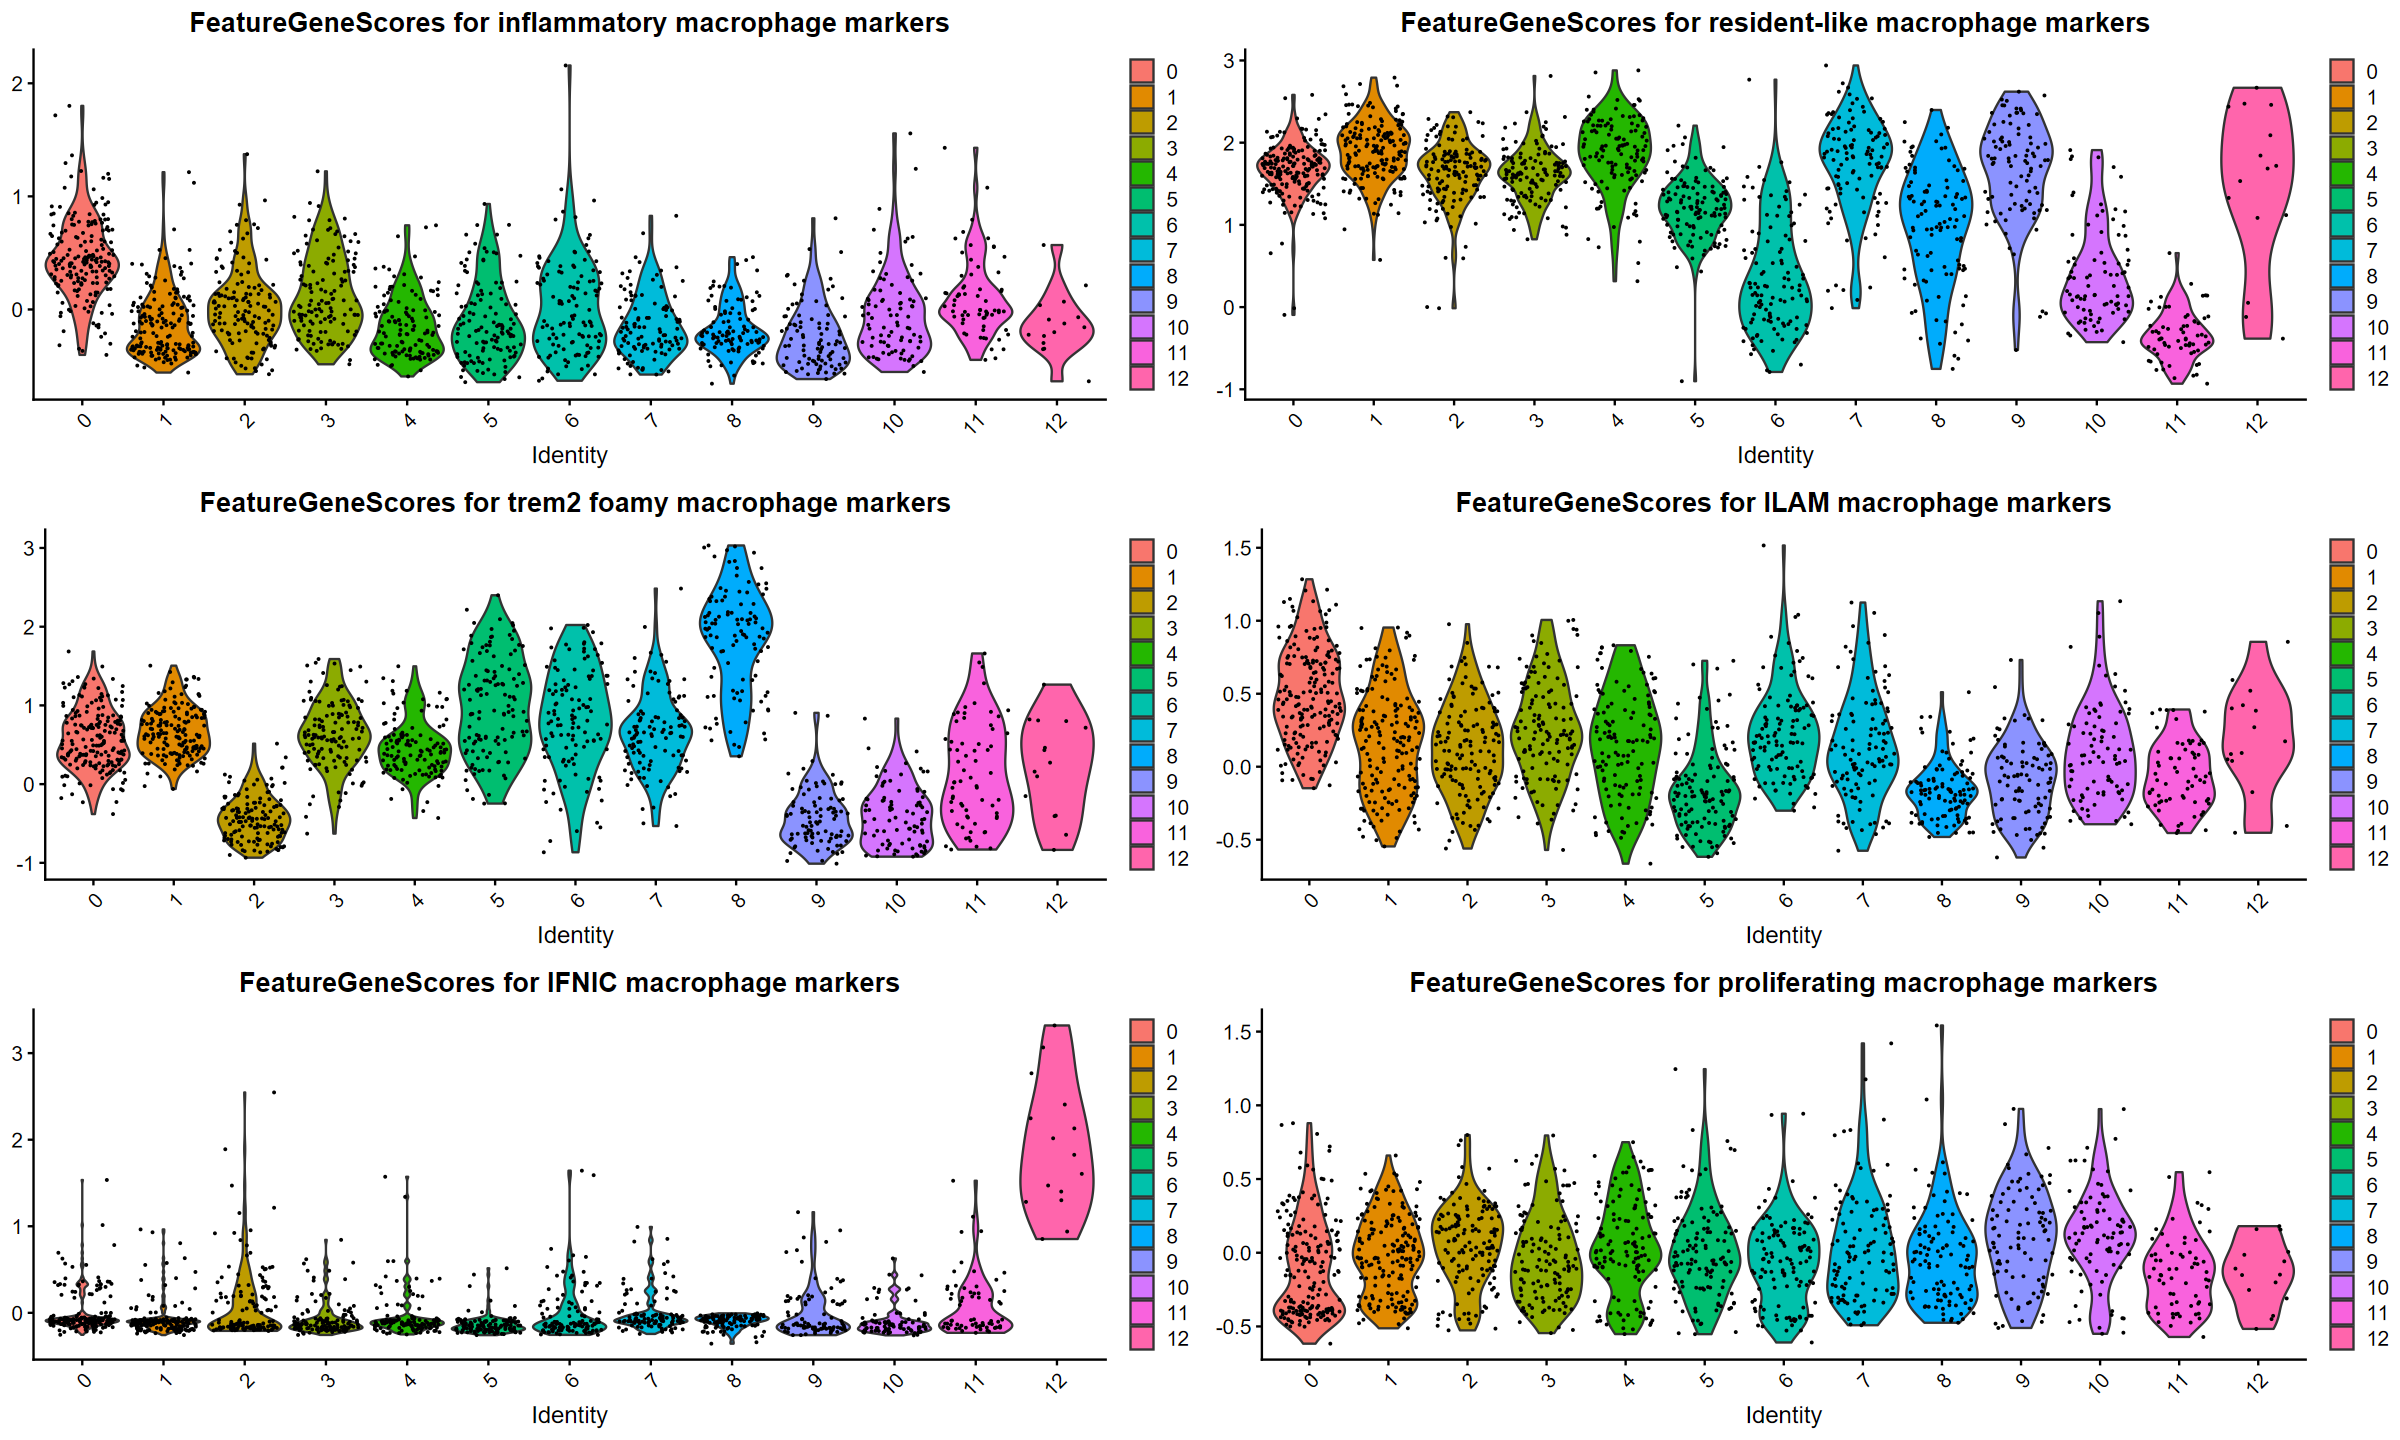

In [ ]:
# Plot marker genes & gene scores
macrophages <- SetIdent(macrophages, value = "seurat_clusters")
grid.arrange(inflammatory_dot, resident_dot, TREM2_dot, IFNIC_dot, proliferating_dot, ilam_dot, ncol = 2)
grid.arrange(inflammatory_vln, residents_vln, trem2_vln, ilam_vln, ifn_vln, proliferating_vln, ncol=2)

In [ ]:
# FindMarkers between cluster 2 and c(Inflammation, Resident-like & TREM2 FOAMY)
known_clusters = list("0", "1", "5")

# Reset Idents
macrophages <- SetIdent(macrophages, value = "seurat_clusters")

# Find Markers
find_markers <- lapply(known_clusters, function(known) {
  FindMarkers(macrophages, ident.1 = "2", ident.2 = known,  only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25) %>%
    filter(p_val_adj < 0.05) %>%
    slice_max(order_by = pct.1, n = 10) %>%
    arrange(desc(pct.1))
})

# Assign each comparison a name
names(find_markers) <- c("inflam", "res", "trem")
find_markers$inflam
find_markers$res
find_markers$trem

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
Ubb     3.219377e-21  1.0146959 1.000 0.984 9.871253e-17
H2-D1   8.648827e-18  0.7330046 1.000 0.968 2.651903e-13
Hspa8   1.744204e-17  1.0492509 1.000 0.963 5.348078e-13
Ftl1    1.986140e-15  0.6440659 1.000 1.000 6.089904e-11
Malat1  3.252668e-12  0.5974455 1.000 1.000 9.973331e-08
mt-nd1  2.464302e-65 12.0957811 0.993 0.000 7.556043e-61
mt-co1  2.464378e-65 12.8257699 0.993 0.000 7.556277e-61
mt-atp6 2.464378e-65 13.3302588 0.993 0.000 7.556277e-61
mt-co3  2.464378e-65 13.0292869 0.993 0.000 7.556277e-61
Jund    1.692387e-15  1.2545533 0.993 0.898 5.189197e-11

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
Hspa8  9.325962e-18 1.1352548  1     0.947 2.859526e-13
Ubb    1.336475e-17 0.9568965  1     0.976 4.097899e-13
H3f3b  2.294025e-16 0.9061709  1     0.982 7.033940e-12
H2-D1  9.198028e-15 0.6718604  1     0.947 2.820299e-10
Eif1   1.085795e-14 0.6643917  1     0.976 3.329263e-10
Rplp0  2.543477e-14 0.7459431  1     0.882 7.798810e-10
Rpl3   4.865644e-13 0.7549326  1     0.853 1.491904e-08
Rps6   1.345964e-08 0.4081415  1     0.953 4.126994e-04
Rpl6   6.662290e-08 0.4420204  1     0.941 2.042791e-03
Rpl13  7.413077e-08 0.4253843  1     0.982 2.272998e-03
Rps18  2.299412e-07 0.4200799  1     0.959 7.050457e-03
Rpl18a 5.034603e-07 0.4005865  1     0.971 1.543710e-02

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
Ubb     1.506088e-15 0.9166656  1.000 0.992 4.617967e-11
H2-D1   2.730054e-11 0.6006023  1.000 0.984 8.370890e-07
Malat1  4.729669e-11 0.6124583  1.000 0.992 1.450211e-06
Rps29   1.816317e-10 0.4676883  1.000 1.000 5.569192e-06
Eif1    3.505870e-10 0.5496075  1.000 0.992 1.074970e-05
H3f3b   3.424581e-09 0.6190655  1.000 0.992 1.050045e-04
Rps4x   1.673837e-07 0.3756930  1.000 0.992 5.132319e-03
Rps3a1  4.861858e-07 0.3857728  1.000 0.984 1.490743e-02
Rps11   1.293290e-06 0.3836690  1.000 0.992 3.965487e-02
mt-co3  1.078216e-46 5.5129812  0.993 0.033 3.306025e-42
mt-atp6 2.094033e-46 5.4514778  0.993 0.033 6.420725e-42
mt-nd1  2.676109e-46 5.4049023  0.993 0.033 8.205485e-42
mt-co1  1.478240e-45 4.9876701  0.993 0.033 4.532579e-41
Jund    2.153295e-22 1.8368504  0.993 0.894 6.602434e-18
Junb    4.022108e-14 1.2065857  0.993 0.894 1.233259e-09
B2m     3.314280e-08 0.4677617  0.993 0.992 1.016225e-03

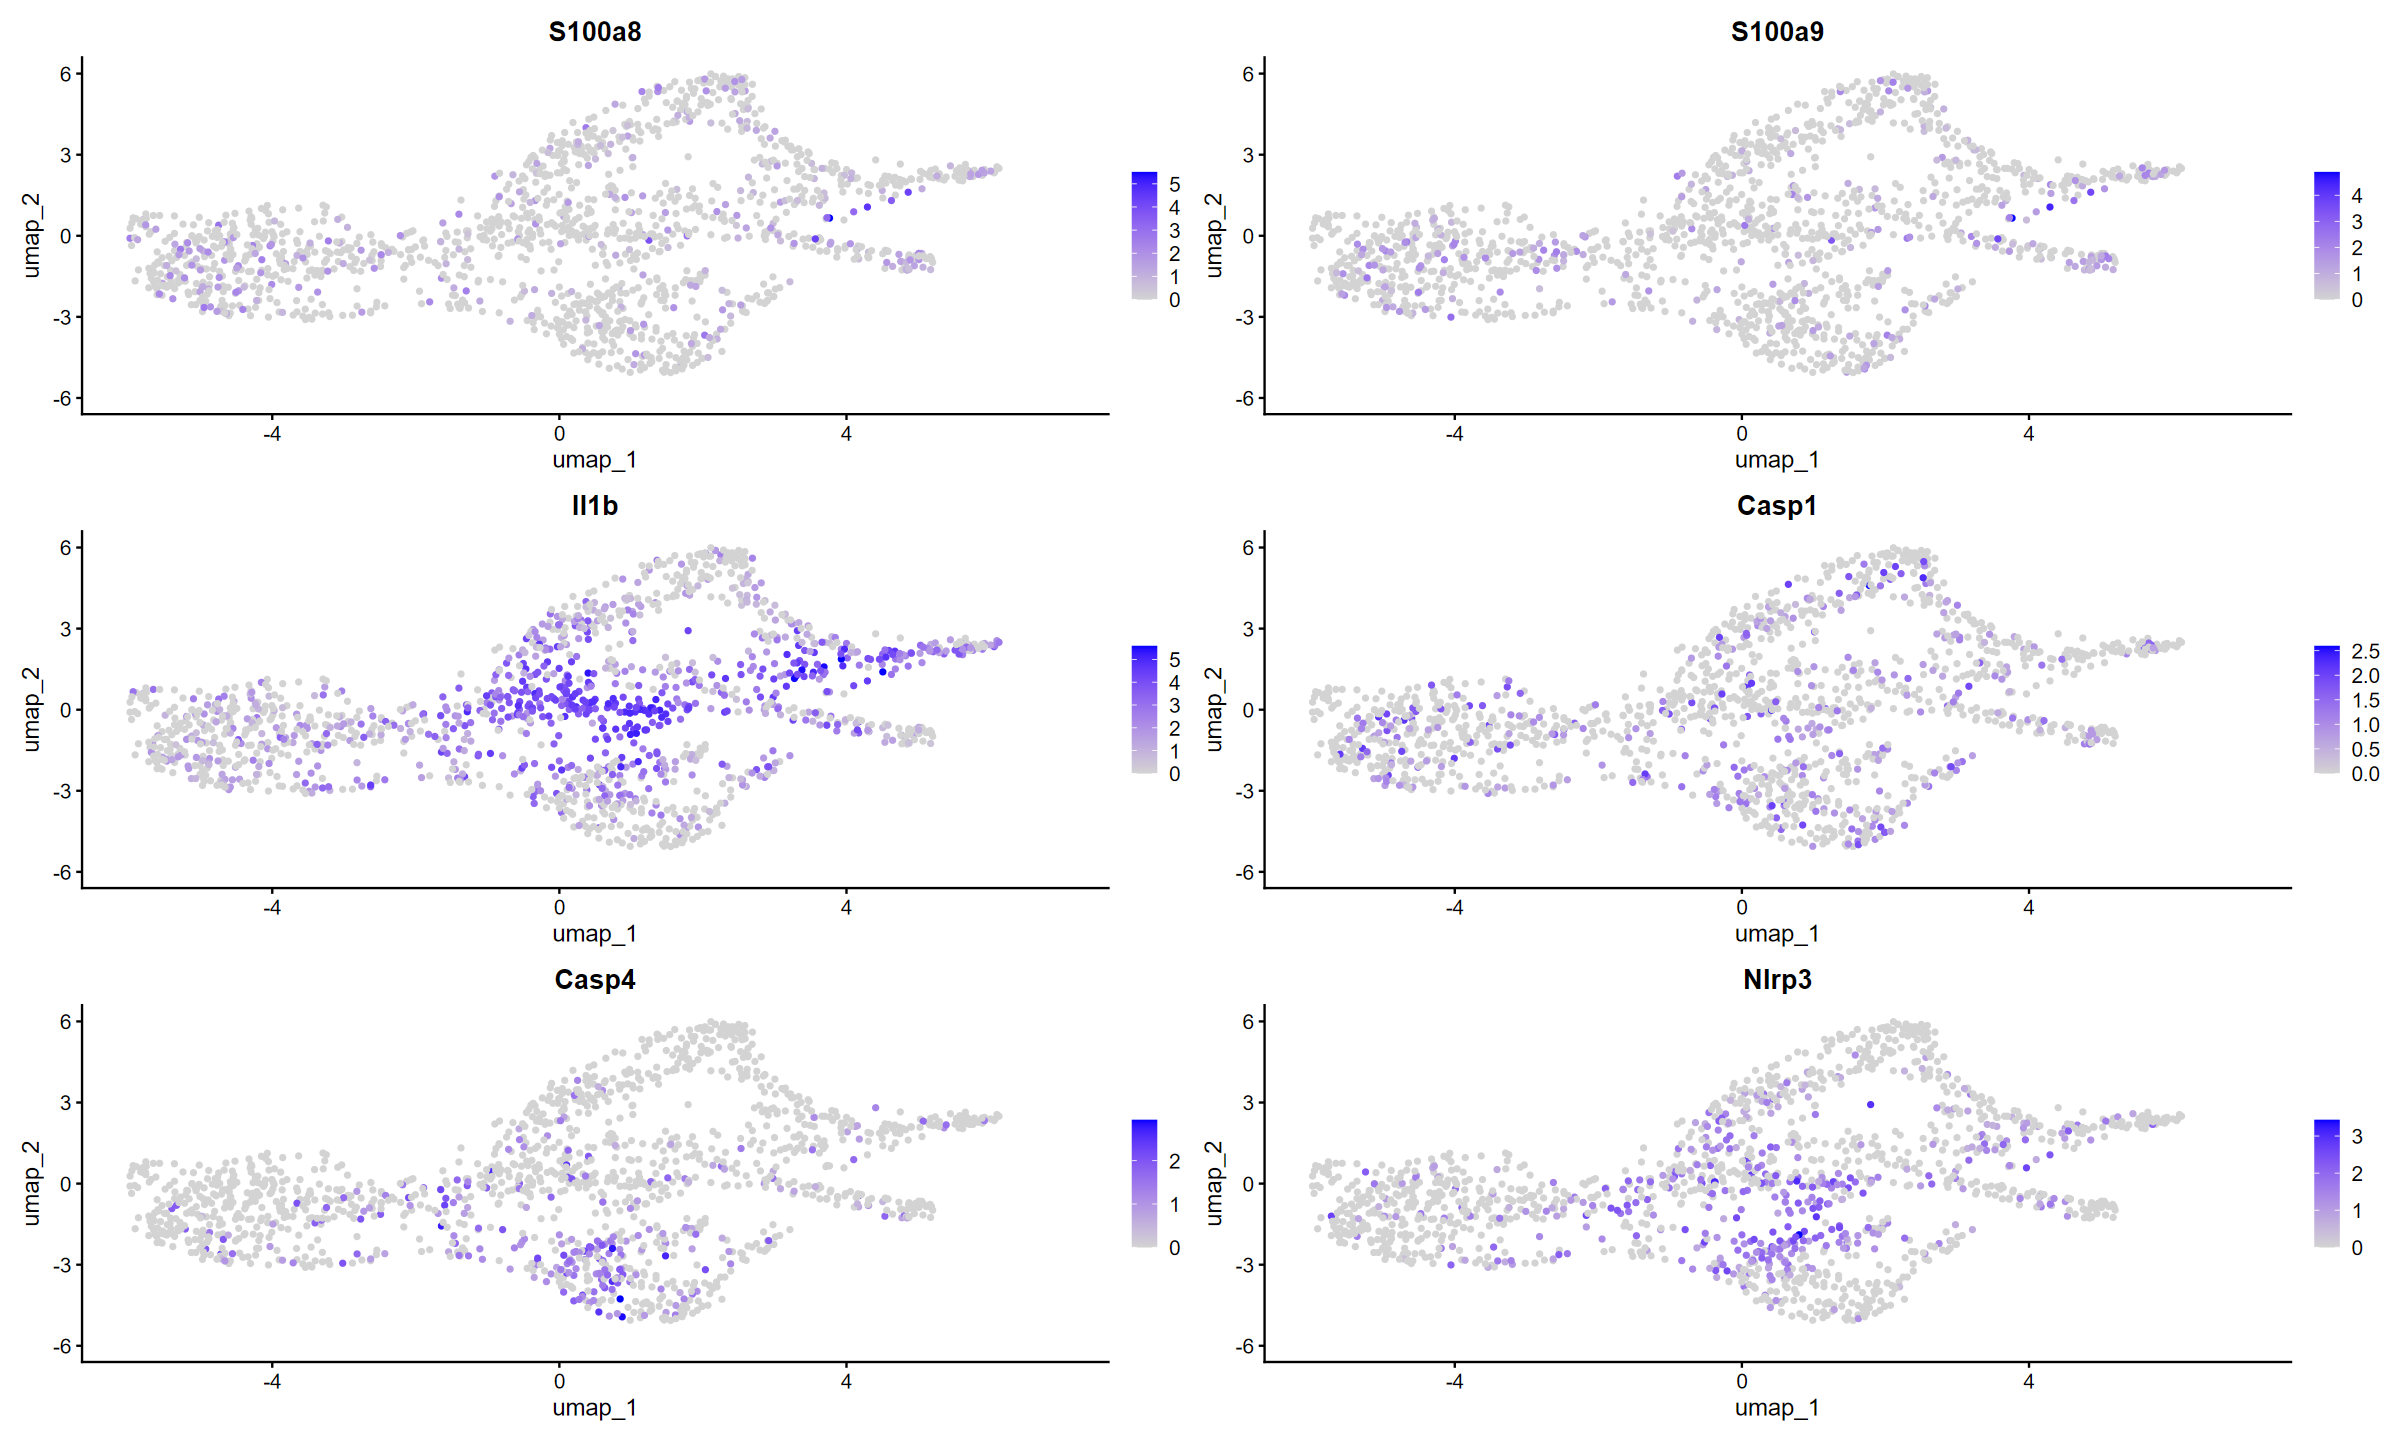

In [ ]:
# Featureplot of inflammatory marker genes
FeaturePlot(macrophages, reduction="umap", features = features_inflammatory)

In [5]:
# Assign new labels
macrophages <- SetIdent(macrophages, value = "seurat_clusters")
macrophages <- RenameIdents(macrophages,
                                   '0' = 'Inflammatory Macrophages',
                                   '1' = 'Resident-like Macrophages',
                                   '2' = 'Inflammatory Macrophages', # Do FindMarkers first before comitting on this one
                                   '3' = 'Inflammatory Macrophages',
                                   '4' = 'Resident-like Macrophages',
                                   '5' = 'TREM2 Macrophages',
                                   '6' = 'TREM1/PLIN2 Macrophages', #TREM1 Foamy (possible)
                                   '7' = 'Inflammatory Macrophages',
                                   '8' = 'TREM2 Macrophages',
                                   '9' = 'Resident-like Macrophages',
                                   '10' = 'TREM2 Macrophages',
                                   '11' = 'Inflammatory Macrophages', # Do FindMarkers first before comitting on this on | Inflammatory Macrophages (?)
                                   '12' = 'IFNIC Macrophages')

# Proportion tables
annotations_per_origin <- table(Idents(macrophages), macrophages$orig.ident)
annotations_per_origin_prop <- prop.table(table(Idents(macrophages), macrophages$orig.ident), margin = 2) * 100

# Subtype plots after annotation
subtype_annotated_plot <- DimPlot(macrophages, reduction = "umap", label = TRUE)
subtype_origin_plot <- DimPlot(macrophages, reduction = "umap", group.by = "orig.ident", label = TRUE)


# Combine tables side by side
combined_df <- cbind(annotations_per_origin, annotations_per_origin_prop)

Healthy (CD20, CD8, CHOW) HFD 10/11 HFD/ WD 20
Inflammatory Macrophages  65                        189       379       
Resident-like Macrophages 62                         82       244       
TREM2 Macrophages         38                        156       120       
TREM1/PLIN2 Macrophages    1                         84        29       
IFNIC Macrophages          1                          7         7       
                          Healthy (CD20, CD8, CHOW) HFD 10/11 HFD/ WD 20
Inflammatory Macrophages  38.9221557                36.486486 48.6521181
Resident-like Macrophages 37.1257485                15.830116 31.3222080
TREM2 Macrophages         22.7544910                30.115830 15.4043646
TREM1/PLIN2 Macrophages    0.5988024                16.216216  3.7227214
IFNIC Macrophages          0.5988024                 1.351351  0.8985879

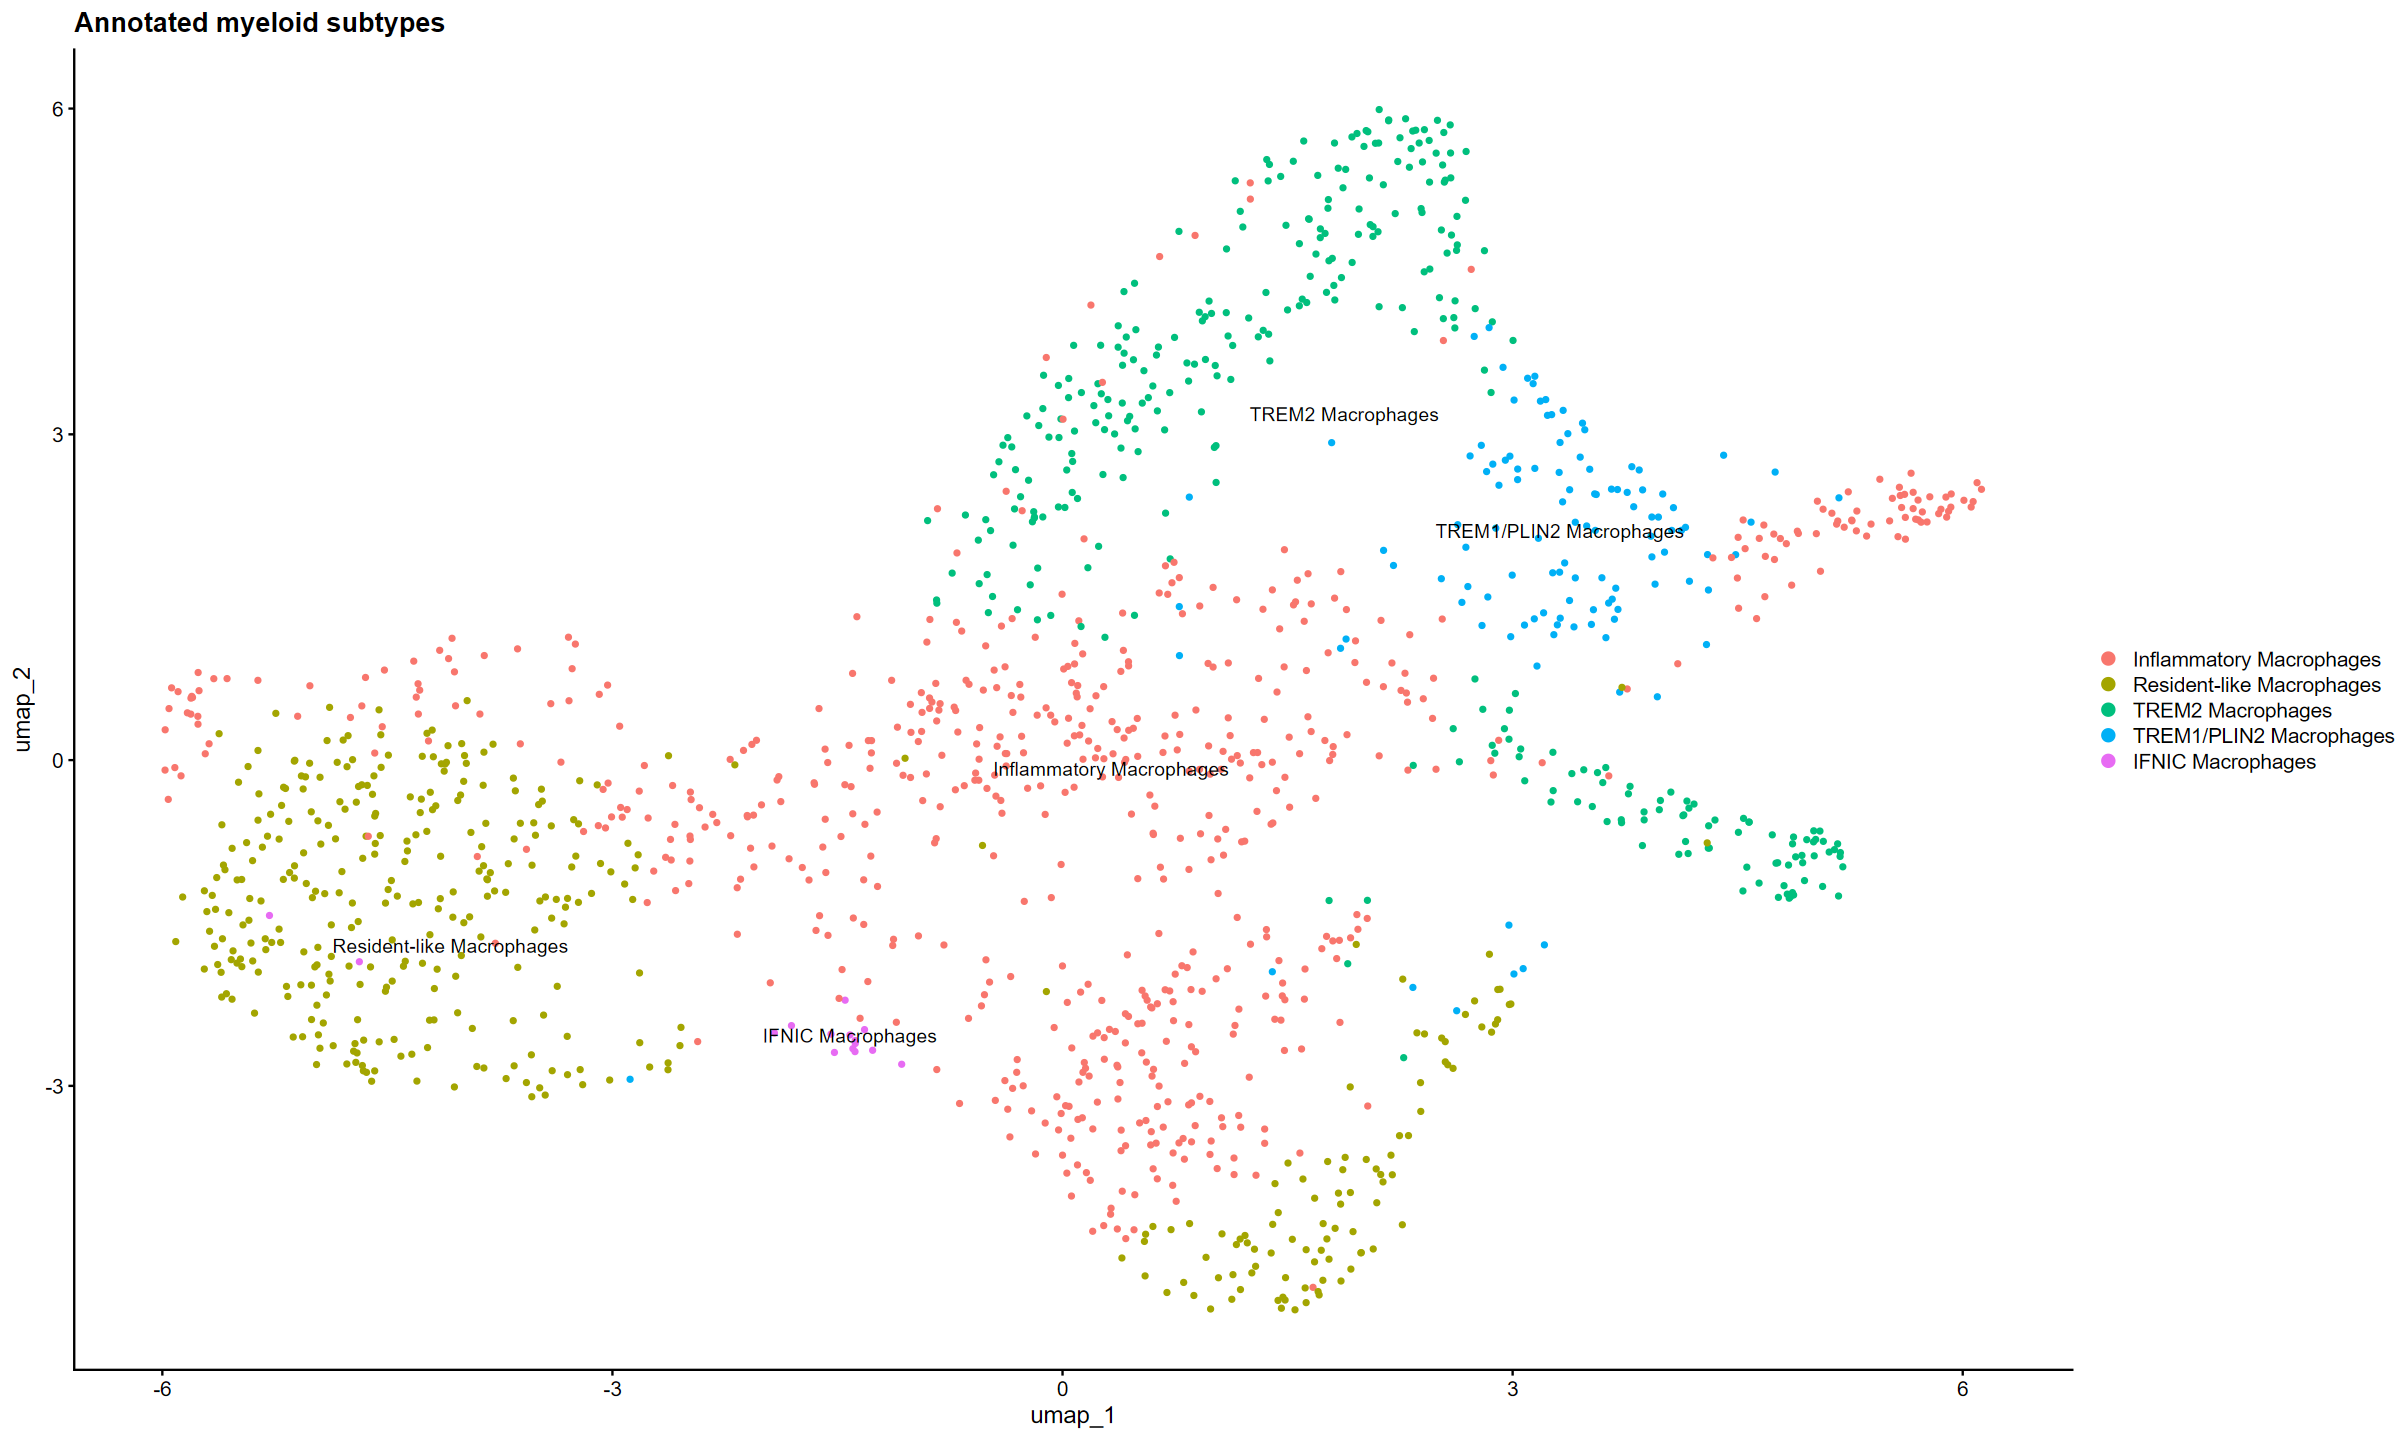

In [6]:
# Plot table
combined_df

# Plotting annotations and titles
grid.arrange(
    subtype_annotated_plot + ggtitle("Annotated myeloid subtypes")
    #subtype_origin_plot + ggtitle("DimPlot by origin")
    #ncol=1
) #38.7, 36.39

Calculating cluster Inflammatory Macrophages

Calculating cluster Resident-like Macrophages

Calculating cluster TREM2 Foamy Macrophages

Calculating cluster TREM1 Foamy (possible)

Calculating cluster Resident-like (unknown)

Calculating cluster IFNIC Macrophages

Warning message in DoHeatmap(macrophages, features = top10$gene, size = 1, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Tmem38b"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


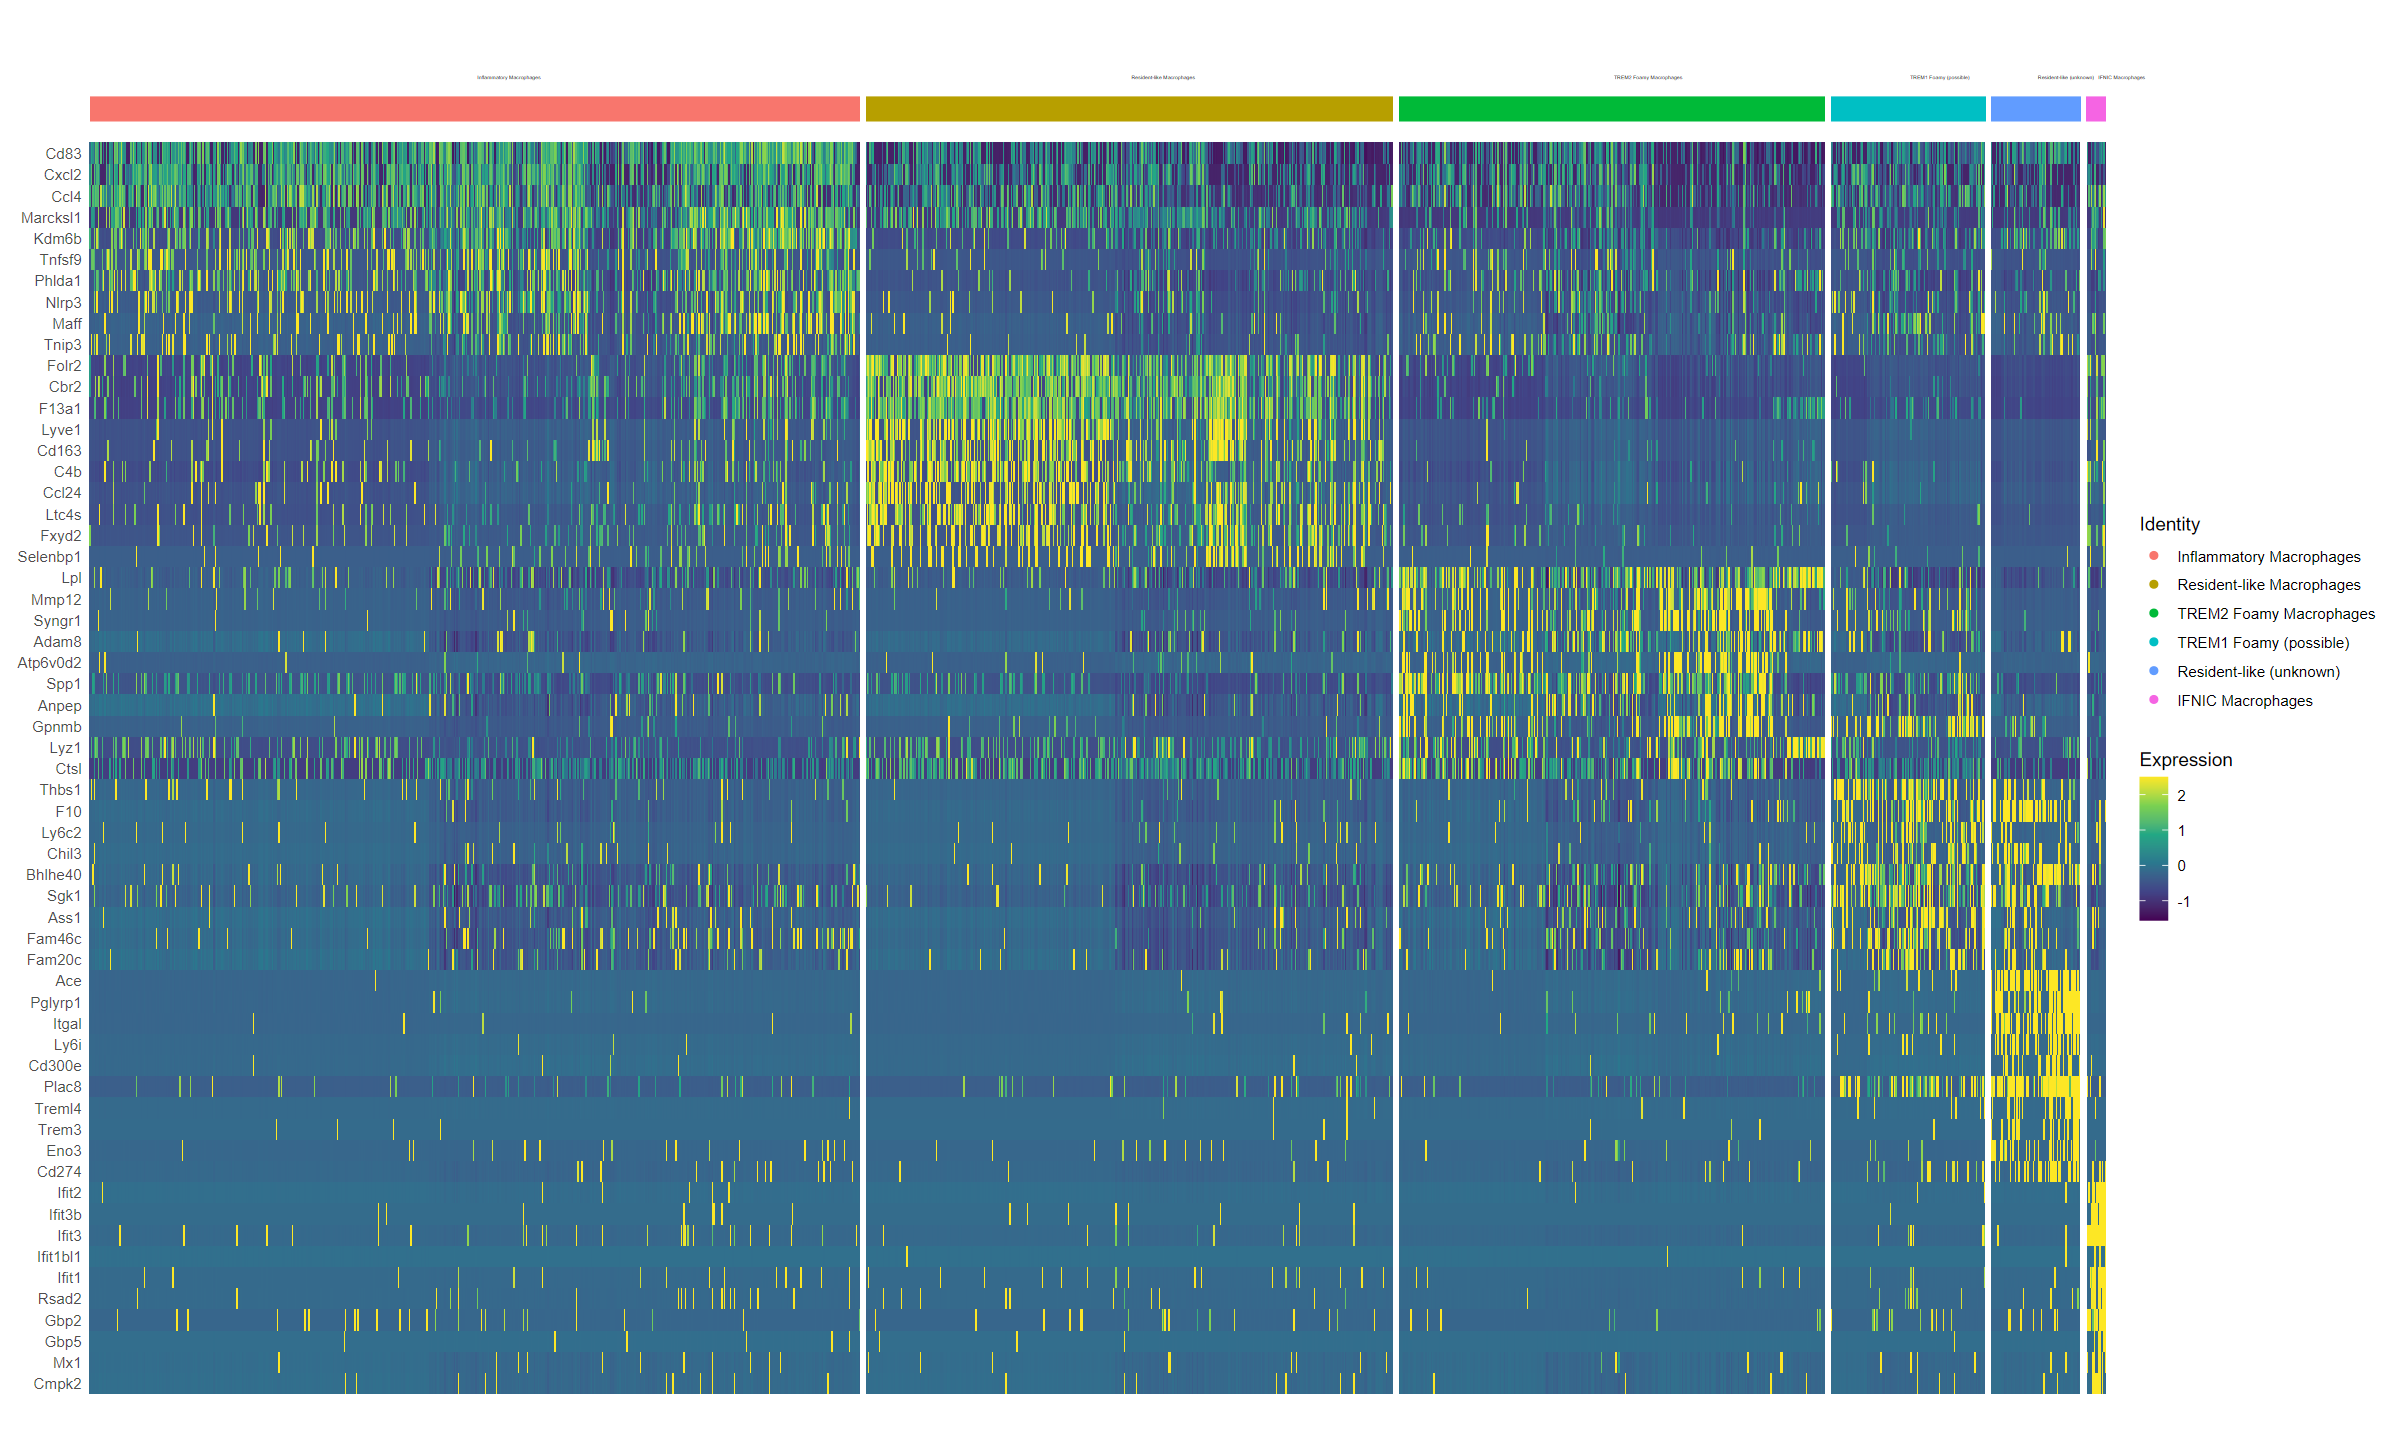

In [ ]:
# Find markers for each cluster
markers <- FindAllMarkers(macrophages, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Heatmap
top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)
DoHeatmap(macrophages, features = top10$gene, size=1, angle=0, raster=FALSE) &
  scale_fill_viridis_c(option="blue",na.value = "white")

In [7]:
saveRDS(macrophages, "all_mice_macrophage_data_annotatedv2.rds")